In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno

from core.src.constants import FINAL_CSV, CLEANED_CSV
from utils.format import drop_na

In [2]:
sns.set(rc={"figure.figsize": (10, 10)})
plt.figure(figsize=(10, 8))
df = pd.read_csv(FINAL_CSV)

<Figure size 1000x800 with 0 Axes>

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

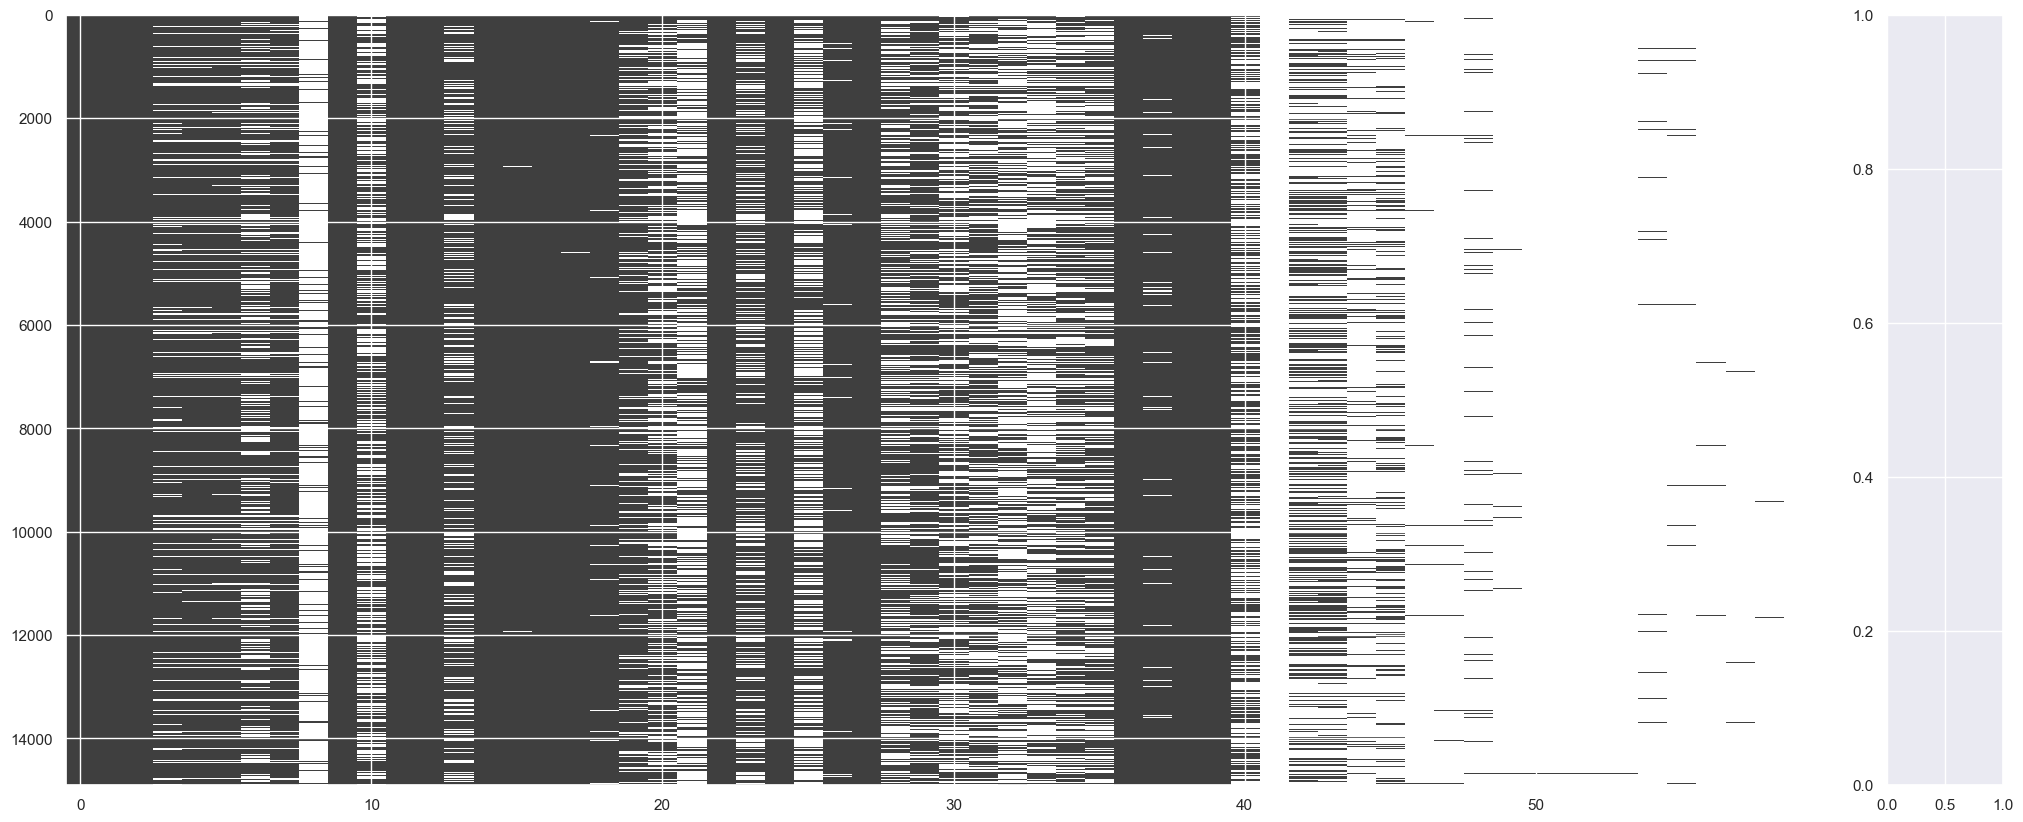

In [3]:
msno.matrix(df)

In [ ]:
msno.bar(df)

# Removing url and path columns

In [4]:
df = df.drop(["url", "path"], axis=1)

# Show columns and the percentage at which their values are not null

In [5]:
def show_columns(df):
    for column in df.columns:
        print(f"{column}: {df[column].count() / len(df) * 100:.2f}%")


show_columns(df)

id: 100.00%
audio si tehnologie: 87.79%
confort si echipamente optionale: 89.97%
electronice si sisteme de asistenta: 89.00%
performanta: 66.12%
siguranta: 87.96%
vehicule electrice: 12.42%
oferit de: 100.00%
are vin (serie sasiu): 55.72%
marca: 100.00%
model: 100.00%
versiune: 74.82%
anul producției: 100.00%
km: 99.57%
combustibil: 100.00%
putere: 99.95%
capacitate cilindrica: 96.93%
transmisie: 83.51%
norma de poluare: 65.62%
consum extraurban: 39.20%
cutie de viteze: 100.00%
consum urban: 65.83%
tip caroserie: 100.00%
emisii co2: 46.40%
numar de portiere: 97.25%
culoare: 100.00%
optiuni culoare: 61.23%
numar locuri: 75.26%
tara de origine: 57.48%
data primei inmatriculari: 63.38%
inmatriculat: 41.23%
primul proprietar (de nou): 40.03%
fara accident in istoric: 59.38%
carte de service: 59.97%
stare: 100.00%
description: 96.57%
price: 100.00%
currency: 100.00%
generatie: 51.59%
masina de epoca: 0.16%
se emite factura: 43.58%
eligibil pentru finantare: 42.35%
sau in limita a: 12.58%
ga

# Remove electric vehicles and their specific columns as they are outliers

In [6]:
initial_len = len(df)


def remove_electric_vehicles(df):
    return df[df["combustibil"] != "electric"]


def remove_electric_columns(df):
    return df.drop(["vehicule electrice", "autonomie", "capacitate baterie", "contract baterie", "timp de incarcare"], axis=1)


df = remove_electric_vehicles(df)
df = remove_electric_columns(df)

print(f"Removed {initial_len - len(df)} electric vehicles")

Removed 453 electric vehicles


# Remove vehicles that are in leasin, as their price is not accurate to our needs

In [7]:
initial_len = len(df)


def remove_leasing(df):
    return df[df["predare leasing"] != "da"]


def remove_leasing_columns(df):
    return df.drop(
        ["predare leasing", "plata initiala (la predare)", "valoare rata lunara", "numar de rate lunare ramase", "valoare reziduala"], axis=1
    )


df = remove_leasing(df)
df = remove_leasing_columns(df)

print(f"Removed {initial_len - len(df)} leasing vehicles")

Removed 121 leasing vehicles


# Remove irrelevant columns

In [8]:
# Removing "tuning" column as it is scrapped as bool "True" or "False", ant the actual tunning in real life can really depend on how much money it cost, so a bool doesn't help us in the car price prediction

df = df.drop(["tuning"], axis=1)

# Drop all rows that have NaN values in the CORE columns

In [9]:
for column in [
    "id",
    "oferit de",
    "marca",
    "model",
    "anul producției",
    "km",
    "combustibil",
    "putere",
    "capacitate cilindrica",
    "cutie de viteze",
    "tip caroserie",
    "stare",
    "price",
]:
    df = drop_na(df, column)

Dropped 0 rows for missing id values.
Dropped 0 rows for missing oferit de values.
Dropped 0 rows for missing marca values.
Dropped 0 rows for missing model values.
Dropped 0 rows for missing anul producției values.
Dropped 47 rows for missing km values.
Dropped 0 rows for missing combustibil values.
Dropped 4 rows for missing putere values.
Dropped 2 rows for missing capacitate cilindrica values.
Dropped 0 rows for missing cutie de viteze values.
Dropped 0 rows for missing tip caroserie values.
Dropped 0 rows for missing stare values.
Dropped 0 rows for missing price values.


# Drop all rows that don't have the currency == 'eur', (we could transofmr ron to euro but there are really a few of them)

In [10]:
initial_len = len(df)

df = df[df["currency"] == "eur"]

print(f"Removed {initial_len - len(df)} non eur currency vehicles")

# Also remove the column
df = df.drop(["currency"], axis=1)

Removed 19 non eur currency vehicles


In [ ]:
# Remove outliers vehicles that have a price

In [11]:
df.to_csv(CLEANED_CSV, index=False)